In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle

mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams['figure.constrained_layout.use'] = False
mpl.rcParams.update({'font.size': 9})

age = 13.800797497330507

In [13]:
path = '../../Data/tracked_particles.hdf5'
with pd.HDFStore(path) as hdf:
    print('Available keys:', *hdf.keys())

Available keys: /h148_13 /h148_28 /h148_37 /h148_68 /h229_20 /h229_22 /h242_24 /h242_80


In [14]:
key = 'h242_24'
particles = pd.read_hdf(path, key=key)
particles.head()

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,host_Zc,host_vx,host_vy,host_vz,sat_disk,sat_halo,IGM,host_halo,host_disk,classification
0,5.18119,811077,0.000037,5.369499e+05,26510.536704,0.000000,317.229043,12.504154,-173.390813,23.552462,...,11877.57706,98.07,206.77,36.51,False,False,True,False,False,5.0
1,5.18119,6872943,0.000560,1.621470e+06,33820.435130,4.999814,305.111904,12.026535,-149.748558,152.158116,...,11877.57706,98.07,206.77,36.51,False,False,False,True,False,4.0
2,5.18119,8840402,0.000179,6.317682e+04,26510.536704,0.000000,352.882340,13.909492,133.276947,199.077824,...,11877.57706,98.07,206.77,36.51,False,False,True,False,False,5.0
3,5.18119,8987571,0.000017,2.664518e+05,26510.536704,0.000000,26.778647,1.055529,-9.585453,-3.929157,...,11877.57706,98.07,206.77,36.51,False,False,True,False,False,5.0
4,5.18119,9655109,0.000078,1.011527e+05,26510.536704,0.000000,16.040076,0.632248,-2.434631,-11.577726,...,11877.57706,98.07,206.77,36.51,False,True,True,False,False,5.0


In [15]:
particles.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'x_rel_host',
       'y_rel_host', 'z_rel_host', 'h1dist', 'h1Rvir', 'sat_Xc', 'sat_Yc',
       'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc', 'host_Yc', 'host_Zc',
       'host_vx', 'host_vy', 'host_vz', 'sat_disk', 'sat_halo', 'IGM',
       'host_halo', 'host_disk', 'classification'],
      dtype='object')

In [16]:
path = '../../Data/ram_pressure.hdf5'
key = 'h242_24'
properties = pd.read_hdf(path, key=key)

In [17]:
properties.head()

,t,a,h1dist,Rvir,M_star,M_gas,hostRvir,vel_CGM,rho_CGM,Pram,vel_CGM_adv,rho_CGM_adv,Pram_adv,M_host_enc,m_sat_enc,r_R,Prest
0,5.181190,0.457383,270.700020,25.369893,10926199.689136274,208360240.15028733,130.372500,146.116291,297.532593,6.352312e+06,20.434550,2305.511011817788,962714.1372828437,442005559592.4621,1697953216.2994156,40.81871275995261,398612126.8426383
0,5.504425,0.477562,243.388818,26.397561,11394804.86943274,200475313.63009107,139.584329,152.728547,335.757067,7.831872e+06,27.285870,1775.2386780667805,1321698.3633675252,366150961891.3287,1795841494.5485384,39.15024894930996,170175599.42348605
0,5.827660,0.497567,218.796210,27.510683,11742831.402330164,178252830.60788983,149.873385,156.932052,417.353072,1.027843e+07,53.799746,2051.1719324332835,5936938.016505106,267429696505.93585,1755704078.9445815,37.022079138164685,194181418.22595572
0,5.868065,0.500057,217.276565,27.655739,11739667.73945315,167131414.92211688,151.117806,157.010812,419.860050,1.035056e+07,50.950994,2071.317585284739,5377148.226513791,269787301844.77963,1753717705.3923483,37.340420434262974,238375849.93531463
0,6.150896,0.517431,214.708289,28.677711,11804031.617436804,158417341.00968948,158.704713,158.722577,404.527711,1.019121e+07,59.058981,2052.008047701425,7157328.741344494,303197266744.5947,1834789381.5764413,39.65495856498719,207716679.09183314


In [35]:
thermo_disk = (np.array(part.temp) < 1.2e4) & (np.array(part.rho) > 0.1)
spatial_disk = np.array(part.r_per_Rvir) < 0.15 # eventually the "spatial disk" should be defined as more of the "dynamical disk"
in_satellite = np.array(part.r_per_Rvir) < 1

cool_disk = thermo_disk & spatial_disk
hot_disk = ~thermo_disk & spatial_disk
cool_halo = thermo_disk & ~spatial_disk & in_satellite
hot_halo = ~thermo_disk & ~spatial_disk & in_satellite
CGM = ~in_satellite
c = cool_disk + 2*hot_disk + 3*cool_halo + 4*hot_halo + 5*CGM

[3.51588361e+43 1.60978620e+43 7.22450299e+43 4.56667577e+43
 3.67595807e+42 3.28337040e+43 6.25860131e+42 1.16297221e+43
 5.40218098e+42 1.35948493e+43 1.68675062e+43 2.13164191e+43
 2.41678141e+43 2.35666184e+43 5.57121879e+42 6.72706240e+41
 5.34842114e+43 9.84884660e+42 1.16559297e+44 2.48570398e+44
 7.63580268e+44 6.84741297e+44 5.48423764e+44 6.66902063e+44
 4.39721934e+44 4.32349768e+44 1.36393385e+44 1.70733739e+44
 1.92852267e+44 2.18903005e+44 3.00166627e+44 3.23336207e+44
 3.70335192e+44]
[2.71996980e+42 3.40078054e+42 3.78191584e+42 3.41175329e+42
 3.55464841e+42 7.17700385e+42 5.12277865e+43 9.46409286e+43
 1.17403681e+44 7.73126955e+43 2.94325766e+44 3.44857867e+43
 4.10098518e+43 2.57360811e+43 1.46726602e+43 5.56710495e+43
 2.09843017e+42 9.19933353e+41 5.04786242e+41 2.30154375e+41
 1.00431306e+41 8.63474541e+40 6.04645866e+40 3.76109601e+40
 3.13426872e+40 2.32209097e+40 2.09114162e+40 1.94452654e+40
 1.58599809e+40 1.37715572e+40 1.23453212e+40 1.08873917e+40
 1.0258

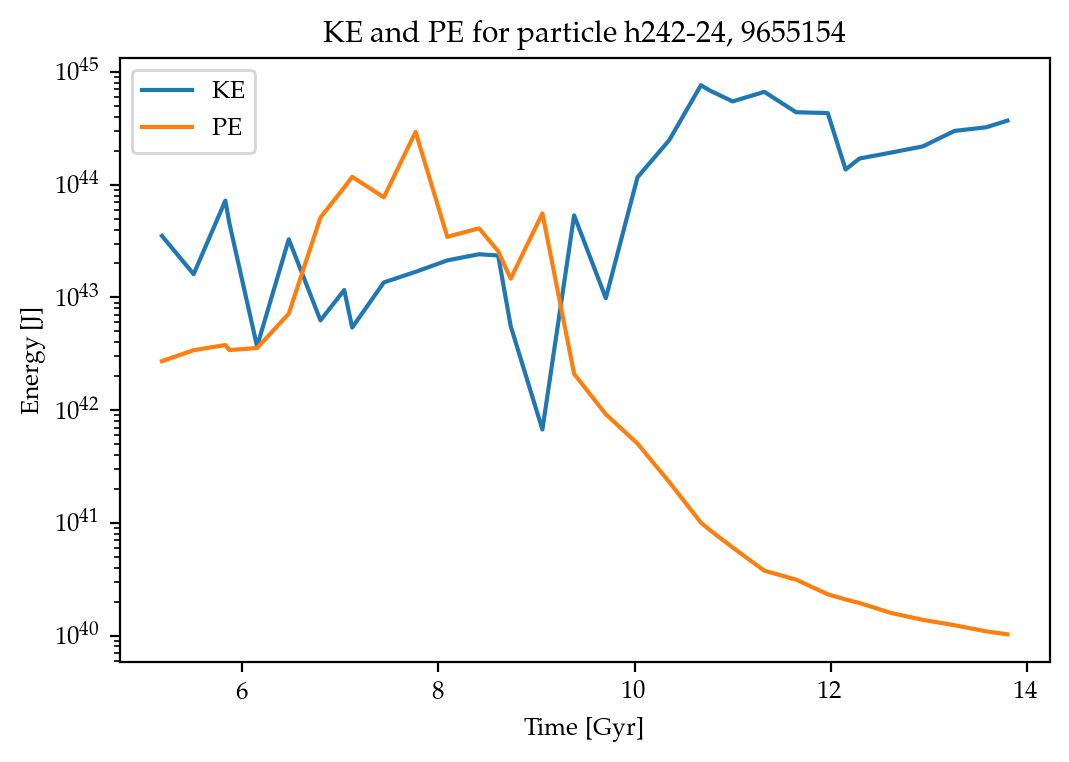

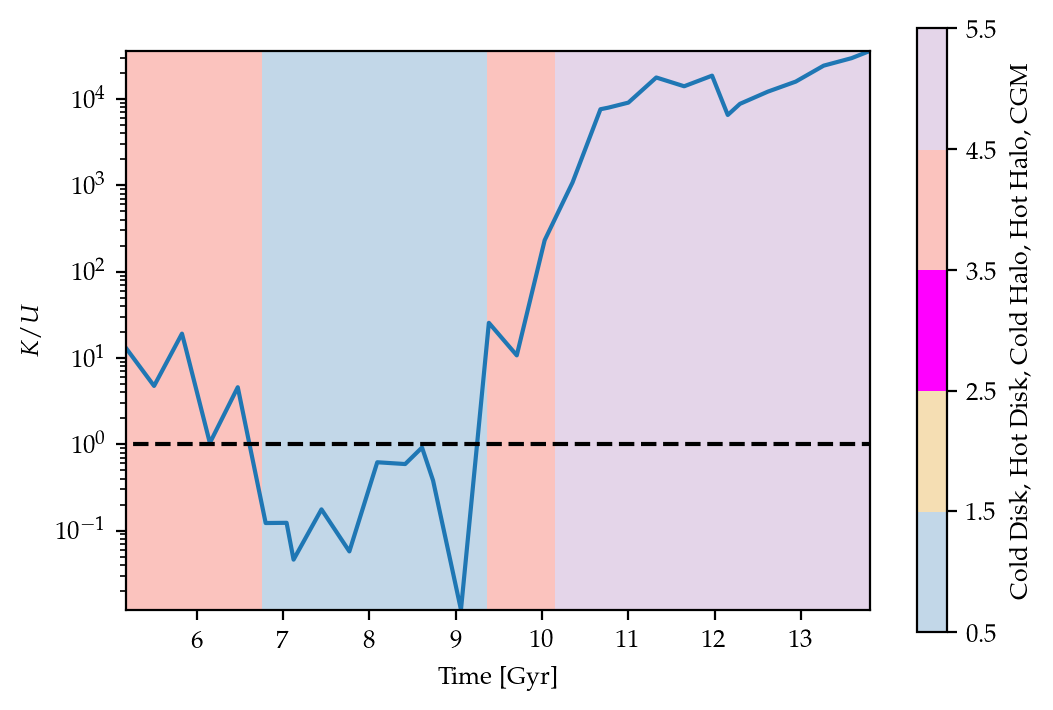

In [51]:
pids = np.unique(particles.pid)
part = particles[particles.pid == pids[6]]

time_part = np.array(part.time)

mass_part = np.array(part.mass)
mass_part *= 1.989e+30 # convert solar masses to kg
vel_part = np.array(part.v)
vel_part *= 1000 # convert km/s to m/s
KE_part = 0.5 * mass_part * vel_part * vel_part # should be in J
print(KE_part)

time_prop = np.array(properties.t)
Mstar_prop = np.array(properties.M_star, dtype=float) 
Mstar_prop *= 1.989e+30
Mgas_prop = np.array(properties.M_gas, dtype=float)
Mgas_prop *= 1.989e+30
M = Mstar_prop + Mgas_prop
r_part = np.array(part.r)
r_part *= 3.086e+19 # convert kpc to meters
PE_part = 6.6743e-11 * M * mass_part / r_part 
print(PE_part)

assert (time_prop == time_part).all()

plt.figure(dpi=200)
plt.title(f"KE and PE for particle {key.replace('_','-')}, {pids[6]}")
plt.plot(time_prop, KE_part, label='KE')
plt.plot(time_prop, PE_part, label='PE')
plt.legend()
plt.semilogy()
plt.ylabel('Energy [J]')
plt.xlabel('Time [Gyr]')
plt.show()


plt.figure(dpi=200)
plt.plot(time_prop, KE_part/PE_part)
plt.semilogy()
plt.plot([5,14],[1,1], 'k--')


yarr = np.vstack((c,))

cmap = mpl.colors.ListedColormap(['#c2d7e8', 'wheat', 'magenta', '#fbc3be', '#e4d5e9'])
boundaries = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.imshow(yarr, extent=(min(time_part),max(time_part), min(KE_part/PE_part),max(KE_part/PE_part)), cmap=cmap, norm=norm, zorder=-1)
plt.colorbar(label='Cold Disk, Hot Disk, Cold Halo, Hot Halo, CGM')
plt.xlabel('Time [Gyr]')
plt.ylabel('$K/U$')
plt.show()



In [43]:
yarr

array([[ 5.18118989,  5.50442517,  5.82766046,  5.86806487,  6.15089574,
         6.47413103,  6.79736632,  7.03979278,  7.1206016 ,  7.44383689,
         7.76707217,  8.09030746,  8.41354274,  8.60883073,  8.73677803,
         9.06001331,  9.3832486 ,  9.70648388, 10.02971917, 10.35295445,
        10.67618974, 10.76709966, 10.99942502, 11.32266031, 11.6458956 ,
        11.96913088, 12.15095073, 12.29236617, 12.61560145, 12.93883674,
        13.26207202, 13.58530731, 13.8007975 ],
       [ 4.        ,  4.        ,  4.        ,  4.        ,  4.        ,
         4.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  4.        ,  4.        ,  4.        ,  5.        ,
         5.        ,  5.        ,  5.        ,  5.        ,  5.        ,
         5.        ,  5.        ,  5.        ,  5.        ,  5.        ,
         5.        ,  5.        ,  5.        ]])

In [54]:
M = np.array(properties.M_star,dtype=float) + np.array(properties.M_gas,dtype=float)
t = np.array(properties.t, dtype=float)
masses = pd.DataFrame({'time':t, 'M':M})
masses

,time,M
0,5.181190,2.192864e+08
1,5.504425,2.118701e+08
2,5.827660,1.899957e+08
3,5.868065,1.788711e+08
4,6.150896,1.702214e+08
5,6.474131,1.732667e+08
6,6.797366,1.817696e+08
7,7.039793,1.714317e+08
8,7.120602,1.617141e+08
9,7.443837,1.387374e+08


In [57]:
data = pd.merge(particles, masses, on='time', how='left')

In [59]:

m = np.array(data.mass) * 1.989e30
v = np.array(data.v) * 1000
K = 0.5 * m * v * v

M = np.array(data.M) * 1.989e30
r = np.array(data.r) * 3.086e19
U = 6.6743e-11 * M * m / r

ratio = K/U

data['K'] = K
data['U'] = U
data['ratio'] = ratio

data

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,sat_disk,sat_halo,IGM,host_halo,host_disk,classification,M,K,U,ratio
0,5.181190,811077,0.000037,5.369499e+05,26510.536704,0.000000,317.229043,12.504154,-173.390813,23.552462,...,False,False,True,False,False,5.0,2.192864e+08,2.427971e+44,1.567966e+41,1548.484011
1,5.181190,6872943,0.000560,1.621470e+06,33820.435130,4.999814,305.111904,12.026535,-149.748558,152.158116,...,False,False,False,True,False,4.0,2.192864e+08,3.326192e+44,2.079750e+41,1599.322701
2,5.181190,8840402,0.000179,6.317682e+04,26510.536704,0.000000,352.882340,13.909492,133.276947,199.077824,...,False,False,True,False,False,5.0,2.192864e+08,2.793106e+44,1.409548e+41,1981.561877
3,5.181190,8987571,0.000017,2.664518e+05,26510.536704,0.000000,26.778647,1.055529,-9.585453,-3.929157,...,False,False,True,False,False,5.0,2.192864e+08,4.125136e+42,1.857467e+42,2.220840
4,5.181190,9655109,0.000078,1.011527e+05,26510.536704,0.000000,16.040076,0.632248,-2.434631,-11.577726,...,False,True,True,False,False,5.0,2.192864e+08,8.744303e+42,3.101011e+42,2.819824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349213,13.800797,10503018,0.000018,2.953280e+05,26510.548793,0.000000,361.417481,7.212325,-312.938541,80.286533,...,False,False,False,True,False,4.0,1.365987e+07,6.904967e+44,8.573054e+39,80542.671916
349214,13.800797,10503024,0.000081,8.588152e+05,26520.522274,0.000000,240.255195,4.794451,-48.069470,61.066270,...,False,False,False,True,False,4.0,1.365987e+07,8.507121e+44,1.290135e+40,65939.756973
349215,13.800797,10503746,0.000117,1.134624e+06,26659.904046,5.228853,271.157246,5.411122,-121.951103,67.224175,...,False,False,False,True,False,4.0,1.365987e+07,1.029487e+45,1.149115e+40,89589.620057
349216,13.800797,10505840,0.000022,4.070112e+05,27619.316654,7.211029,267.735199,5.342833,14.907680,90.504259,...,False,False,False,True,False,4.0,1.365987e+07,9.871753e+44,1.205684e+40,81876.794160


In [115]:
data.keys()

Index(['time', 'pid', 'rho', 'temp', 'mass', 'coolontime', 'r', 'r_per_Rvir',
       'x', 'y', 'z', 'satRvir', 'a', 'vx', 'vy', 'vz', 'v', 'x_rel_host',
       'y_rel_host', 'z_rel_host', 'h1dist', 'h1Rvir', 'sat_Xc', 'sat_Yc',
       'sat_Zc', 'sat_vx', 'sat_vy', 'sat_vz', 'host_Xc', 'host_Yc', 'host_Zc',
       'host_vx', 'host_vy', 'host_vz', 'sat_disk', 'sat_halo', 'IGM',
       'host_halo', 'host_disk', 'classification', 'M', 'K', 'U', 'ratio',
       'cool_disk', 'hot_disk', 'cool_halo', 'hot_halo', 'CGM'],
      dtype='object')

In [61]:
thermo_disk = (np.array(data.temp) < 1.2e4) & (np.array(data.rho) > 0.1)
spatial_disk = np.array(data.r_per_Rvir) < 0.15 # eventually the "spatial disk" should be defined as more of the "dynamical disk"
in_satellite = np.array(data.r_per_Rvir) < 1

cool_disk = thermo_disk & spatial_disk
hot_disk = ~thermo_disk & spatial_disk
cool_halo = thermo_disk & ~spatial_disk & in_satellite
hot_halo = ~thermo_disk & ~spatial_disk & in_satellite
CGM = ~in_satellite
c = cool_disk + 2*hot_disk + 3*cool_halo + 4*hot_halo + 5*CGM

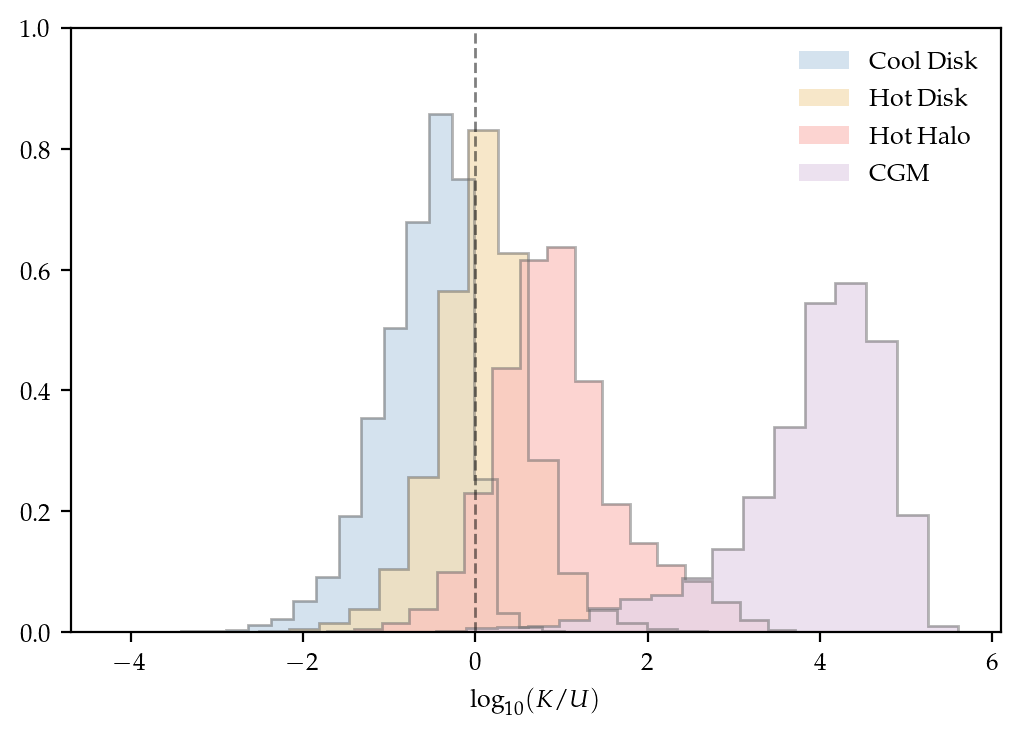

In [86]:
ratio_1 = ratio[c==1]
ratio_2 = ratio[c==2]
ratio_3 = ratio[c==3]
ratio_4 = ratio[c==4]
ratio_5 = ratio[c==5]

plt.figure(dpi=200)
plt.hist(np.log10(ratio_1), alpha=0.7, bins=20, density=True, label='Cool Disk', color='#c2d7e8')
plt.hist(np.log10(ratio_1), histtype='step', bins=20, density=True, color='0.4',alpha=0.5)
plt.hist(np.log10(ratio_2), alpha=0.7, bins=20, density=True, label='Hot Disk', color='wheat')
plt.hist(np.log10(ratio_2), histtype='step', bins=20, density=True, color='0.4',alpha=0.5)
plt.hist(np.log10(ratio_4), alpha=0.7, bins=20, density=True, label='Hot Halo', color='#fbc3be')
plt.hist(np.log10(ratio_4), histtype='step', bins=20, density=True, color='0.4',alpha=0.5)
plt.hist(np.log10(ratio_5), alpha=0.7, bins=20, density=True, label='CGM', color='#e4d5e9')
plt.hist(np.log10(ratio_5), histtype='step', bins=20, density=True, color='0.4',alpha=0.5)
plt.legend(frameon=False)
plt.xlabel(r'$\log_{10}(K/U)$')
plt.plot([0,0],[0,1],'k--',alpha=0.5, linewidth=1)
plt.ylim(0,1)
plt.show()

In [87]:
thermo_disk = (np.array(data.temp) < 1.2e4) & (np.array(data.rho) > 0.1)
grav_disk = np.array(data.ratio) < 1 
in_satellite = np.array(data.r_per_Rvir) < 1

cool_disk = thermo_disk & grav_disk
hot_disk = ~thermo_disk & grav_disk
cool_halo = thermo_disk & ~grav_disk & in_satellite
hot_halo = ~thermo_disk & ~grav_disk & in_satellite
CGM = ~in_satellite
c = cool_disk + 2*hot_disk + 3*cool_halo + 4*hot_halo + 5*CGM

In [88]:
data['cool_disk'] = cool_disk
data['hot_disk'] = hot_disk
data['cool_halo'] = cool_halo
data['hot_halo'] = hot_halo
data['CGM'] = CGM

In [95]:
print(f'{len(cool_disk[cool_disk])/len(cool_disk)*100:.1f}% cool disk')
print(f'{len(cool_disk[hot_disk])/len(cool_disk)*100:.1f}% hot disk')
print(f'{len(cool_disk[cool_halo])/len(cool_disk)*100:.1f}% cool halo')
print(f'{len(cool_disk[hot_halo])/len(cool_disk)*100:.1f}% hot halo')
print(f'{len(cool_disk[CGM])/len(cool_disk)*100:.1f}% CGM')

6.9% cool disk
5.2% hot disk
0.5% cool halo
24.7% hot halo
62.8% CGM


Ejected gas particles are a subset of those gas particles that leave the disk that also become gravitationally unbound from the disk. That is, if all gas particles that leave the disk can be determined as 

```leave_the_disk = (cool_disk -> hot_disk) + (cool_disk -> cool_halo) + (cool_disk -> hot_halo) + (cool_disk -> CGM)```

Then ejected gas particles are the subset that become gravitationally unbound, or

`ejected = (cool_disk -> cool_halo) -> (cool_disk -> hot_halo) + (cool_disk -> CGM)`

Ejected gas should also include `hot_disk` gas that was previously in the `cool_disk`. 




We create two datasets for analysis: ejected and expulsed gas particles. 

- The `ejected` dataset contains information about gas particles that go from the disk to the halo, at the first snapshot where they are identified as part of the halo. The distinction between disk and halo is based on whether the particle is gravitationally bound to the baryonic disk of the galaxy, assuming the baryonic mass is entirely contained at the center of the disk.  

- The `expelled` dataset contains information about gas particles that go from the halo to the CGM, at the first snapshot where they are identified as part of the CGM. The distinction between satellite halo and CGM is based on whether the particle is outside the virial radius of the satellite. 

If a particle is found in the `expelled` dataset, it should also be found (at a previous time) in the `ejected` dataset. The inverse is not true, however, as a gas particle can be ejected from the disk and return shortly after without ever leaving the virial radius of the halo. This criteria is enforced by the `can_be_expelled` variable in the cell below, and is intended to distinguish between particles that enter the halo (from the CGM) only to leave it. We are only interested in counting a particle as "expelled" if it was in the disk, was ejected, and then was expelled. 

In [102]:
import tqdm

ejected = pd.DataFrame()
expelled = pd.DataFrame()

pids = np.unique(data.pid)
for pid in tqdm.tqdm(pids):
    dat = data[data.pid==pid]

    cool_disk = np.array(dat.cool_disk, dtype=bool)
    hot_disk = np.array(dat.hot_disk, dtype=bool)
    cool_halo = np.array(dat.cool_halo, dtype=bool)
    hot_halo = np.array(dat.hot_halo, dtype=bool)
    CGM = np.array(dat.CGM, dtype=bool)
    time = np.array(dat.time,dtype=float)
    
    for i,t2 in enumerate(time[1:]):
            i += 1
            t1 = time[i-1]
            
            if cool_disk[i-1] and (cool_halo[i] or hot_halo[i]):
                state1 = 'cool disk'
                out = dat[time==t2].copy()
                out['state1'] = state1
                ejected = pd.concat([ejected, out])
                can_be_expelled = True
            elif hot_disk[i-1] and (cool_halo[i] or hot_halo[i]):
                state1 = 'hot disk'
                out = dat[time==t2].copy()
                out['state1'] = state1
                ejected = pd.concat([ejected, out])
                can_be_expelled = True
                
                
            if (cool_halo[i-1] or hot_halo[i-1]) and CGM[i]:
                if can_be_expelled:
                    expelled = pd.concat([expelled, dat[time==t2]])
            

100%|██████████| 10614/10614 [01:50<00:00, 95.88it/s]


In [103]:
ejected

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,M,K,U,ratio,cool_disk,hot_disk,cool_halo,hot_halo,CGM,state1
233431,10.999425,8840402,0.032016,1.062233e+04,25998.371252,0.000000,0.973172,0.023329,0.342369,0.715065,...,3.449096e+07,1.417476e+43,7.883900e+42,1.797938,False,False,False,True,False,cool disk
265125,11.969131,8840402,0.000012,8.835081e+05,26262.456941,0.000000,18.672786,0.419804,-11.665798,9.078854,...,2.282329e+07,6.853262e+43,2.746527e+41,249.524631,False,False,False,True,False,cool disk
169786,9.383249,9655154,0.000141,2.483269e+04,27174.938061,8.634599,7.024781,0.186665,-4.502239,-5.376475,...,6.339856e+07,5.348421e+43,2.098430e+42,25.487725,False,False,False,True,False,cool disk
21233,5.827660,9726512,0.000102,3.820462e+04,26510.536704,0.000000,18.805355,0.683566,-2.724857,-3.011942,...,1.899957e+08,2.780820e+43,2.291712e+42,12.134245,False,False,False,True,False,hot disk
21234,5.827660,9726655,0.000357,3.305134e+04,26510.536704,0.000000,10.180314,0.370049,0.923500,-2.006004,...,1.899957e+08,6.001452e+42,4.233313e+42,1.417672,False,False,False,True,False,hot disk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201605,10.029719,10501302,0.008744,4.321131e+06,19013.169648,10.014238,1.052461,0.026855,-0.818902,0.580747,...,4.985654e+07,5.176576e+43,7.706375e+42,6.717265,False,False,False,True,False,hot disk
31831,5.827660,10503014,0.000251,3.184966e+05,27192.974950,5.681718,7.090632,0.257741,2.610676,-3.585440,...,1.899957e+08,1.314307e+43,6.234403e+42,2.108153,False,False,False,True,False,cool disk
74277,6.797366,10503024,0.004097,1.722065e+04,26519.952361,0.000000,4.048622,0.130521,-1.865141,-0.716962,...,1.817696e+08,2.566559e+43,1.018747e+43,2.519330,False,False,False,True,False,cool disk
21223,5.504425,10503746,0.001319,2.431624e+04,26657.690020,5.228853,6.452039,0.244418,-1.915226,0.466249,...,2.118701e+08,6.458300e+43,7.489876e+42,8.622707,False,False,False,True,False,cool disk


In [104]:
expelled

,time,pid,rho,temp,mass,coolontime,r,r_per_Rvir,x,y,...,classification,M,K,U,ratio,cool_disk,hot_disk,cool_halo,hot_halo,CGM
201613,10.352954,811077,0.000017,1.086080e+05,26510.543612,0.000000,57.487461,1.438086,-28.567391,-28.930443,...,4.0,4.451892e+07,8.223559e+43,1.756586e+41,468.155720,False,False,False,False,True
169781,9.383249,6872943,0.000230,2.711861e+04,33820.794348,4.999814,52.015024,1.382160,-20.151712,-33.364737,...,4.0,6.339856e+07,3.320995e+44,3.527068e+41,941.574105,False,False,False,False,True
307258,12.938837,8840402,0.000007,7.381693e+05,26262.456941,0.000000,64.293344,1.356008,-21.064121,60.718051,...,4.0,1.667339e+07,1.627503e+44,5.827371e+40,2792.860030,False,False,False,False,True
137950,8.608831,8987571,0.000026,1.724417e+05,26510.536704,0.000000,44.981917,1.252731,19.834882,-38.992212,...,4.0,8.687349e+07,1.958721e+44,4.380737e+41,447.121438,False,False,False,False,True
106118,7.767072,9655109,0.000108,2.656753e+04,26510.536704,0.000000,48.195439,1.423516,13.258277,-46.324693,...,5.0,1.325745e+08,8.377100e+43,6.239531e+41,134.258482,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137942,8.413543,10503018,0.000173,8.125743e+04,26510.536704,0.000000,49.145961,1.385157,6.224118,-45.786314,...,4.0,9.649845e+07,3.494954e+44,4.453797e+41,784.713484,False,False,False,False,True
148554,8.608831,10503024,0.000060,1.581003e+05,26519.952361,0.000000,45.154996,1.257551,15.702797,-36.920147,...,4.0,8.687349e+07,4.394151e+44,4.365496e+41,1006.563974,False,False,False,False,True
106111,7.443837,10503746,0.000328,1.487364e+05,26657.753919,5.228853,41.496881,1.415130,12.302540,-33.788203,...,5.0,1.387374e+08,8.450141e+44,7.625721e+41,1108.110434,False,False,False,False,True
127334,8.090307,10505840,0.000019,1.359072e+06,27615.513779,7.211029,48.004935,1.382342,11.215655,-44.488055,...,5.0,1.106866e+08,1.079578e+44,5.448057e+41,198.158413,False,False,False,False,True


In [110]:
def calc_angles(d):
    # get gas particle velocity
    v = np.array([d.vx,d.vy,d.vz])

    # get velocity of CGM wind (host velocity relative to satellite)
    v_sat = np.array([d.sat_vx,d.sat_vy,d.sat_vz])
    v_host = np.array([d.host_vx,d.host_vy,d.host_vz])
    v_rel = v_host - v_sat # we want the velocity of the host in the satellite rest frame

    # take the dot product and get the angle, in degrees
    v_hat = v / np.linalg.norm(v)
    v_rel_hat = v_rel / np.linalg.norm(v_rel)
    angle = np.arccos(np.dot(v_hat,v_rel_hat)) * 180/np.pi

    d['angle'] = angle
        
    return d

# apply the calc_angles function along the rows of ejected and expelled
print('Calculating ejection angles')
ejected = ejected.apply(calc_angles, axis=1)
print('Calculating expulsion angles')
expelled = expelled.apply(calc_angles, axis=1)
    

Calculating ejection angles
Calculating expulsion angles


In [111]:
N = 50 # more bins than Bahé et al since we have lots of particles
theta1,theta2 = 0,0 # initialize
bins = np.array([theta1]) 
while theta2 < 3.14:
    theta2 = np.arccos(np.cos(theta1)-(2/N))
    bins = np.append(bins,theta2)
    theta1 = theta2

bins = bins*180/np.pi
bincenters = 0.5*(bins[1:]+bins[:-1])
print(bins)

[  0.          16.26020471  23.07391807  28.35763658  32.85988038
  36.86989765  40.53580211  43.94551956  47.15635696  50.2081805
  53.13010235  55.94420226  58.6677485   61.31459799  63.89611886
  66.42182152  68.89980398  71.33707512  73.73979529  76.11345964
  78.46304097  80.79310378  83.10789742  85.41143426  87.70755722
  90.          92.29244278  94.58856574  96.89210258  99.20689622
 101.53695903 103.88654036 106.26020471 108.66292488 111.10019602
 113.57817848 116.10388114 118.68540201 121.3322515  124.05579774
 126.86989765 129.7918195  132.84364304 136.05448044 139.46419789
 143.13010235 147.14011962 151.64236342 156.92608193 163.73979529
 179.99999774]


In [112]:
ejected['weight'] = ejected['mass'] / ejected['mass'].sum()
expelled['weight'] = expelled['mass'] / expelled['mass'].sum()

It is now time to construct our plot!

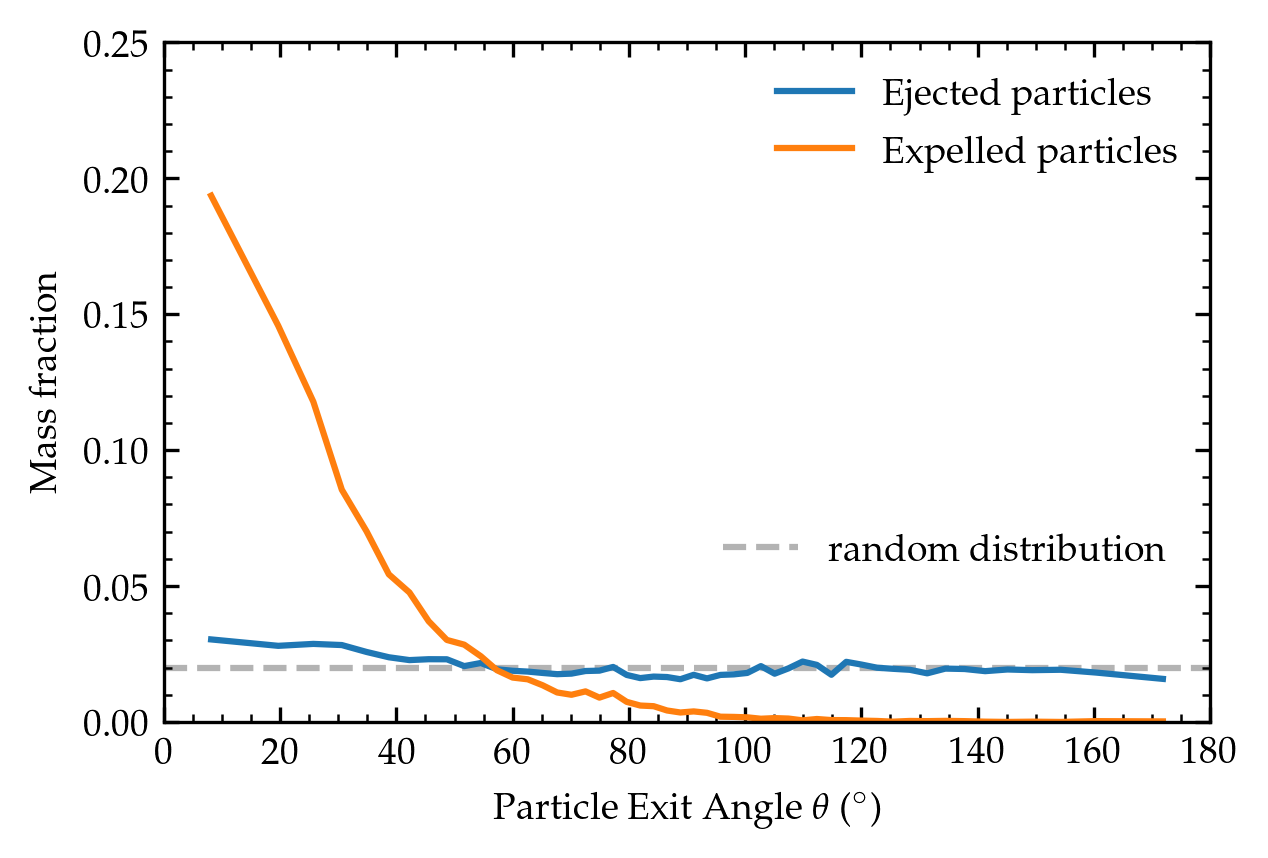

In [117]:
fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3))

y1, bins = np.histogram(ejected.angle, bins=bins, weights=ejected.weight)
l1 = 'Ejected particles'
p1, = ax.plot(bincenters, y1, label=l1)

y2, bins = np.histogram(expelled.angle, bins=bins, weights=expelled.weight)
l2 = 'Expelled particles'
p2, = ax.plot(bincenters, y2, label=l2)

# plot the line that represents a random distribution
percent = 1/N
p3, = ax.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1)

# add legends
leg1 = ax.legend([p1,p2],[l1,l2], frameon=False)
leg1._legend_box.align = 'right'
leg2 = ax.legend([p3],['random distribution'], frameon=False, loc=(0.52,0.2))
ax.add_artist(leg1)

# labels and ticks and such
ax.set_xlabel(r'Particle Exit Angle $\theta$ ($^\circ$)')
ax.set_ylabel('Mass fraction')
ax.set_xlim(0,180)
ax.set_ylim(0,0.25)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
ax.tick_params(direction='in',which='both',right=True,top=True)

plt.show()